In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, classification_report

In [6]:
from sklearn.preprocessing import LabelEncoder

## 데이터 로딩

In [29]:
data=pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


## 전처리

In [7]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [8]:
316/1485

0.2127946127946128

In [9]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

<Axes: xlabel='color'>

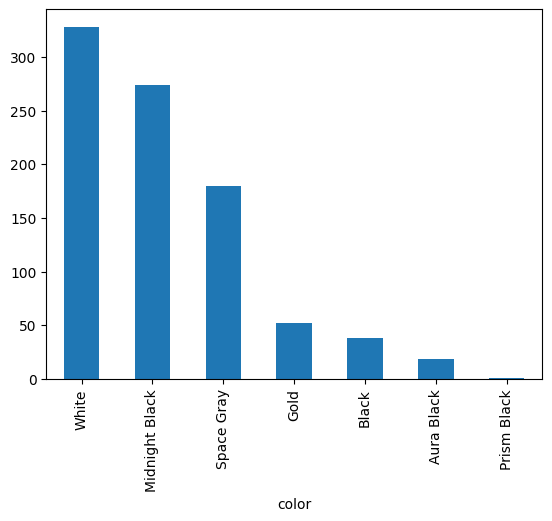

In [11]:
data['color'].value_counts().plot(kind='bar')

In [7]:
data = data.drop(columns=['carrier'],axis=1)

In [13]:
data.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1


In [8]:
# productline과 관련있는 색으로 채움. productline별로 color 최빈값으로 채움
data['color'] = data.groupby('productline')['color'].transform(lambda x: x.fillna(x.mode()[0]))

In [15]:
data.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,White,Galaxy_Note9,contains description,0,0,0
2,0,199.99,White,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1


In [17]:
data

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,White,Galaxy_Note9,contains description,0,0,0
2,0,199.99,White,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...
1480,0,89.50,Midnight Black,Galaxy_S7,no description,96,2,0
1481,0,239.95,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,Midnight Black,Galaxy_S7,no description,92,2,1


<Axes: xlabel='startprice,sold'>

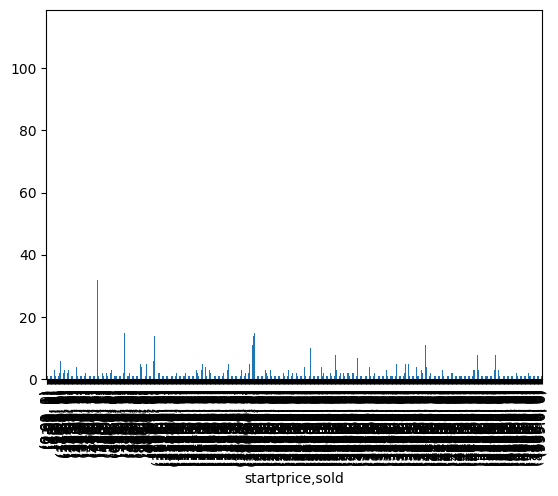

In [25]:
data.groupby('startprice')['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='productline,sold'>

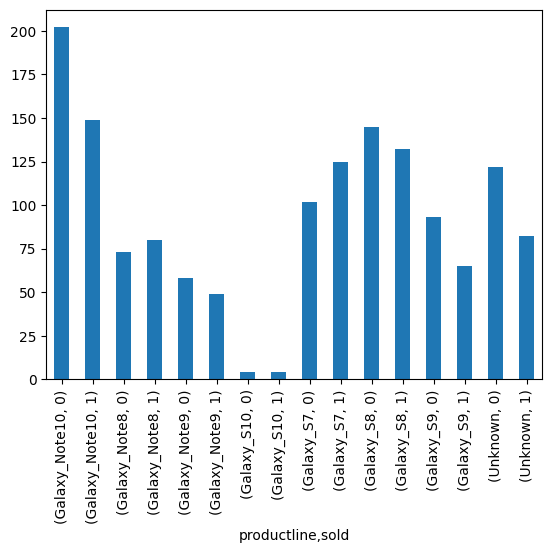

In [27]:
data.groupby('productline')['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='color,sold'>

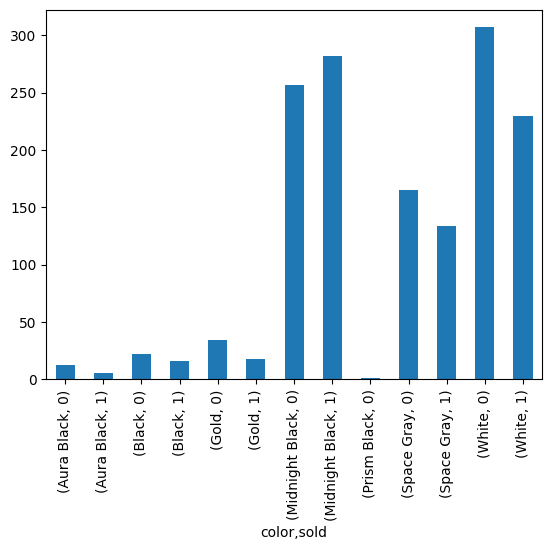

In [28]:
data.groupby('color')['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='productline,color,sold'>

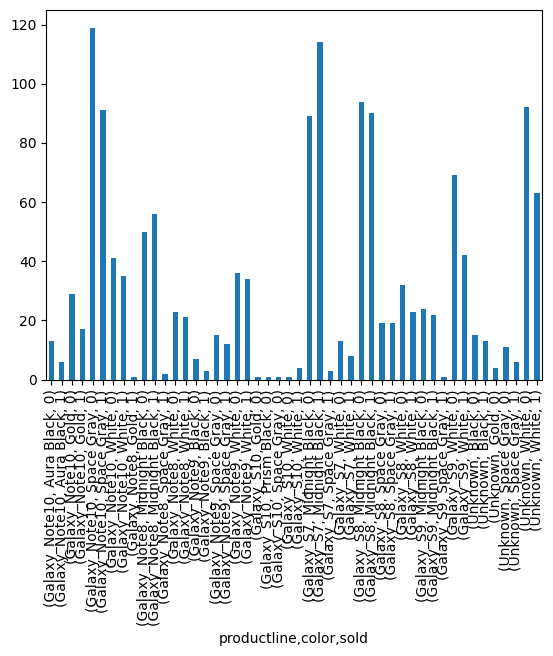

In [29]:
data.groupby(['productline','color'])['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='noDescription,sold'>

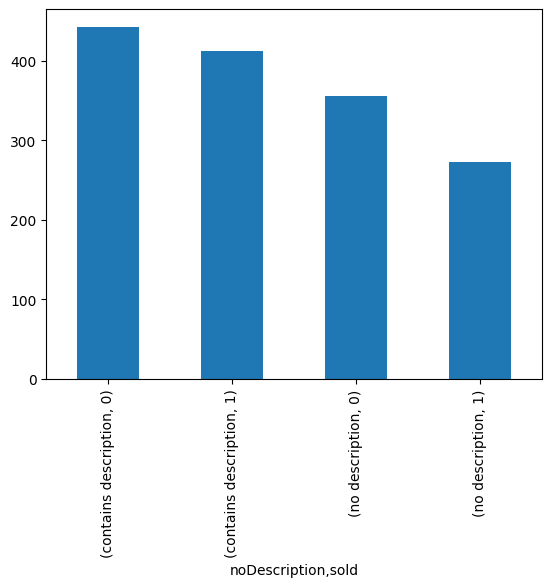

In [30]:
data.groupby('noDescription')['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='charCountDescription,sold'>

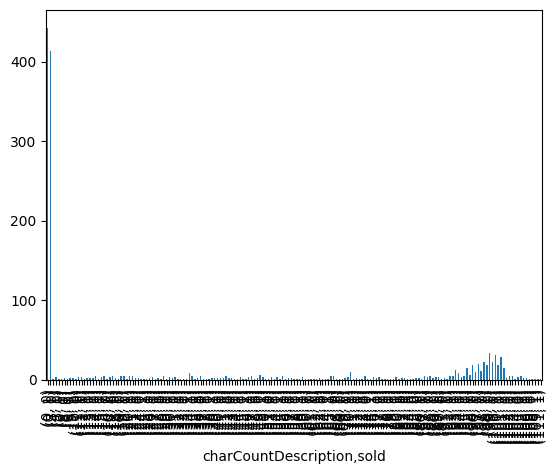

In [32]:

data.groupby('charCountDescription')['sold'].value_counts(sort=False).plot(kind='bar')

In [18]:
data['noDescription'].unique()

array(['contains description', 'no description'], dtype=object)

In [19]:
pd.get_dummies(data, columns=['color', 'productline', 'noDescription'], drop_first=True )

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0,235.00,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,0,199.99,100,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True
3,1,175.00,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,1,100.00,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1481,0,239.95,97,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True
1482,0,329.99,93,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1483,0,89.00,92,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True


In [20]:
data['startprice'].min()

np.float64(0.01)

In [21]:
data['startprice'].max()

np.float64(999.0)

In [24]:
data['startprice'].describe()

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

In [31]:
data['charCountDescription'].describe()

count    1485.000000
mean       31.184512
std        41.744518
min         0.000000
25%         0.000000
50%         0.000000
75%        79.000000
max       111.000000
Name: charCountDescription, dtype: float64

In [9]:
data['charCountDescription'] = data['charCountDescription'].apply(lambda x: 0 if x < 79 else 1)

In [10]:
data=pd.get_dummies(data, columns=['color', 'productline', 'noDescription'], drop_first=True )

In [35]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0,235.00,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,0,199.99,1,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True
3,1,175.00,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,1,100.00,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,1,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1481,0,239.95,1,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True
1482,0,329.99,1,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1483,0,89.00,1,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True


In [11]:
# 가격 범위에 따른 구간 나누기
bins = [0, 80, 198, 310, 999]
labels = ['Very Low', 'Low', 'Medium', 'High']

data['price_category'] = pd.cut(data['startprice'], bins=bins, labels=labels, right=True)

In [52]:
data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description,price_category
0,0,199.99,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,Medium
1,0,235.00,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,Medium
2,0,199.99,1,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,Medium
3,1,175.00,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,Low
4,1,100.00,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,1,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,Low
1481,0,239.95,1,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True,Medium
1482,0,329.99,1,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,High
1483,0,89.00,1,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True,Low


In [53]:
price= data[['startprice']]

In [54]:
data = data.drop(columns=['startprice'],axis=1)

In [55]:
data

,BuyItNow,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description,price_category
0,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,Medium
1,0,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,Medium
2,0,1,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,Medium
3,1,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,Low
4,1,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,1,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,Low
1481,0,1,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True,Medium
1482,0,1,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,High
1483,0,1,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True,Low


In [62]:
le = LabelEncoder()
data['price_category'] = le.fit_transform(data['price_category'])


In [63]:
data

,BuyItNow,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description,price_category
0,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,2
1,0,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,2
2,0,1,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,2
3,1,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,1
4,1,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,1,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,1
1481,0,1,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True,2
1482,0,1,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0
1483,0,1,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True,1


In [72]:
data = pd.concat([data, price], axis=1)

In [73]:
data

,BuyItNow,charCountDescription,upperCaseDescription,sold,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description,price_category,startprice
0,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,2,199.99
1,0,0,0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,2,235.00
2,0,1,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,2,199.99
3,1,0,0,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,1,175.00
4,1,0,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,1,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,1,2,0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,1,89.50
1481,0,1,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,True,2,239.95
1482,0,1,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0,329.99
1483,0,1,2,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True,1,89.00


In [120]:
data2=data.copy()

## EDA

## Feature Engineering

## 데이터 분리 및 분석

## 성능평가 및 성능 개선을 위한 튜닝

In [78]:
X=data.drop('sold', axis=1)

In [79]:
y=data['sold']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=8)

In [85]:
dtc=DecisionTreeClassifier(max_depth=5,random_state=8)
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7946127946127947
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       147
           1       0.82      0.76      0.79       150

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.80      0.79      0.79       297



In [125]:
X2=data2.drop('sold', axis=1)

In [126]:
y2=data2['sold']

In [127]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=8)

In [140]:
dtc2=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=8)
dtc2.fit(X_train2,y_train2)
pred2=dtc2.predict(X_test2)
print(accuracy_score(y_test2,pred2))
print(classification_report(y_test2,pred2))

0.7946127946127947
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       147
           1       0.82      0.76      0.79       150

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.80      0.79      0.79       297



data3에 pricebyproduct2에 있는 기종별 평균 가격 추가 / [meanprice] => 평균가격 <br>
startprice 컬럼과 비교해서 isUnderMean 컬럼 추가 => 평균보다 저렴하면 1, 비싸면 0

In [8]:
pricebyproduct2 = data.groupby('productline')['startprice'].describe()
pricebyproduct2

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [9]:
data3=data.copy()

In [11]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [12]:
def meanPrice(product):
    if product =='Galaxy_Note10':
        return 366.931311
    elif product =='Galaxy_Note8':
        return 176.065033
    elif product =='Galaxy_Note9':
        return 254.561402
    elif product =='Galaxy_S10':
        return 294.583750
    elif product =='Galaxy_S7':
        return 84.190000
    elif product =='Galaxy_S8':
        return 165.883321
    elif product =='Galaxy_S9':
        return 231.268101
    elif product =='Unknown':
        return 171.994265
    

In [13]:
data3['meanprice']=data3['productline'].apply(meanPrice)
data3

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321
...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0,84.190000
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1,231.268101
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0,366.931311
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1,84.190000


In [16]:
for product in pricebyproduct2.index:
    print(pricebyproduct2.loc[product,'mean'])

366.9313105413105
176.06503267973858
254.56140186915889
294.58375
84.19
165.883321299639
231.2681012658228
171.99426470588236


In [14]:
data4=data.copy()

In [19]:
data4['meanprice']=data4['productline'].apply(lambda x : pricebyproduct2.loc[x,'mean'])

In [21]:
data4

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321
...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0,84.190000
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1,231.268101
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0,366.931311
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1,84.190000


In [22]:
data3['isunerMean']=data3.apply(lambda x: 1 if x['startprice']<x['meanprice'] else 0, axis=1)

In [23]:
data3

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice,isunerMean
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1,231.268101,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0,254.561402,1
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,171.994265,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,254.561402,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1,165.883321,1
...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0,84.190000,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1,231.268101,0
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0,366.931311,1
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1,84.190000,0


In [25]:
data4['isunerMean']=data4.apply(lambda x: 1 if x['startprice']<x['meanprice'] else 0,axis=1)

In [26]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     -------------------------------------- 125.2/125.2 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   --------------------------------------- 356.2/356.2 kB 21.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB ? eta 0:

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [27]:
from ydata_profiling import ProfileReport

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
profile = ProfileReport(data, title="Profiling Report")

In [32]:
profile.to_file("samsung_ebay.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 249.88it/s]
